In [22]:
import numpy as np
import pandas as pd
import healpy as hp
from DS_Planck_Unet import train_pix_act, draw_pic
from DS_healpix_fragmentation import radec2pix, one_pixel_fragmentation, matr2dict
from matplotlib import pyplot as plt

In [3]:
a = np.zeros(hp.nside2npix(2))
a[train_pix_act] = 1

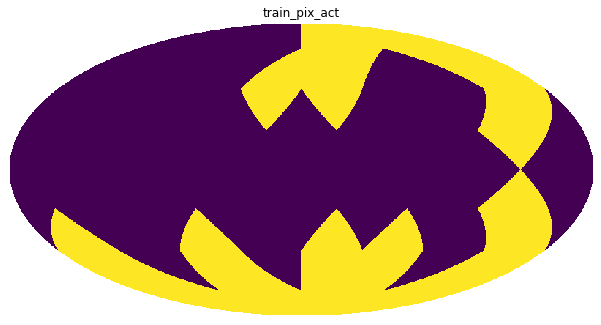

In [5]:
hp.mollview(a, nest=True, title='train_pix_act', cbar=False)

In [9]:
abell = pd.read_csv('/home/rt2122/Data/original_catalogs/csv/Abell.csv')

In [11]:
ra, dec = abell.iloc[2198]['RA'], abell.iloc[2198]['DEC']

In [15]:
pix2, pix11 = radec2pix(ra, dec, 2), radec2pix(ra, dec, 2**11)

In [16]:
matr = one_pixel_fragmentation(2, pix2, 10)
pix11

1689334

In [47]:
mdict = matr2dict(matr)
x, y = mdict[pix11]
x, y

(669, 430)

In [32]:
coords = [(247.0343, 39.5769), (247.2617, 39.5674), (247.1504, 39.4382), (247.1566, 39.6125)]
for r, d in coords:
    x1, y1 = mdict[radec2pix(r, d, 2**11)]
    print(x - x1, y - y1)

-1 -2
4 0
-3 3
3 -2


In [48]:
size=16
sm_matr = matr[x-size:x+size+1, y-size:y+size+1]

In [49]:
pic = draw_pic(sm_matr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


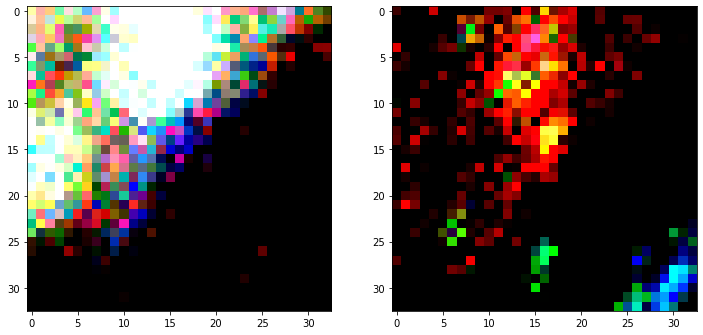

In [50]:
_, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(pic[:,:,:3])
ax[1].imshow(pic[:,:,3:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


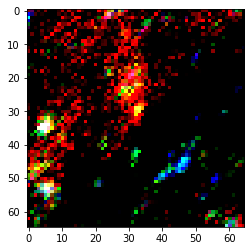

In [25]:
plt.imshow(pic[:, :, 3:])